In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [81]:
veh=pd.read_csv('vehicle.csv')

In [82]:
veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [83]:
veh.shape

(846, 19)

In [84]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Only class column is object type and rest of the columns are numeric.

We could see that there are a few missing values in almost all the columns.

In [85]:
veh.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [86]:
veh.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [87]:
veh.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


Replacing all the missng values with random values between 25% and 75% (IQR) of the respective columns values.

In [88]:
veh['circularity']=veh['circularity'].fillna(random.randrange(40, 49))
veh['distance_circularity']=veh['distance_circularity'].fillna(random.randrange(70, 98))
veh['radius_ratio']=veh['radius_ratio'].fillna(random.randrange(114, 195))
veh['pr.axis_aspect_ratio']=veh['pr.axis_aspect_ratio'].fillna(random.randrange(57, 65))
veh['scatter_ratio']=veh['scatter_ratio'].fillna(random.randrange(147, 198))
veh['elongatedness']=veh['elongatedness'].fillna(random.randrange(33, 46))
veh['pr.axis_rectangularity']=veh['pr.axis_rectangularity'].fillna(random.randrange(19, 23))
veh['scaled_variance']=veh['scaled_variance'].fillna(random.randrange(167, 217))
veh['scaled_variance.1']=veh['scaled_variance.1'].fillna(random.randrange(318, 587))
veh['scaled_radius_of_gyration']=veh['scaled_radius_of_gyration'].fillna(random.randrange(149, 198))
veh['scaled_radius_of_gyration.1']=veh['scaled_radius_of_gyration.1'].fillna(random.randrange(67, 75))
veh['skewness_about']=veh['skewness_about'].fillna(random.randrange(2, 9))
veh['skewness_about.1']=veh['skewness_about.1'].fillna(random.randrange(5, 19))
veh['skewness_about.2']=veh['skewness_about.2'].fillna(random.randrange(184, 193))

In [90]:
veh.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Now we do not see any missing values.

# Visualising the dataset using box plots

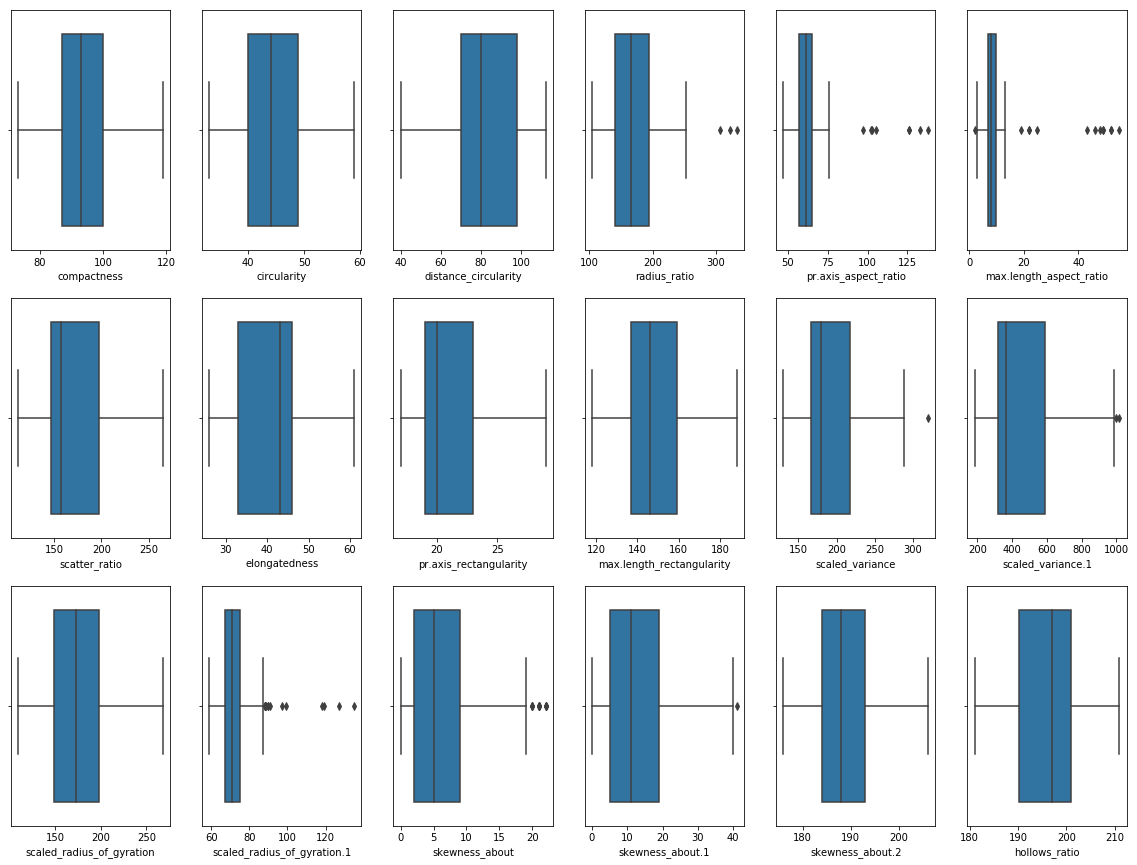

In [91]:
f,axes=plt.subplots(3,6,figsize=(20,15))
sns.boxplot(veh['compactness'],ax=axes[0,0])
sns.boxplot(veh['circularity'],ax=axes[0,1])
sns.boxplot(veh['distance_circularity'],ax=axes[0,2])
sns.boxplot(veh['radius_ratio'],ax=axes[0,3])
sns.boxplot(veh['pr.axis_aspect_ratio'],ax=axes[0,4])
sns.boxplot(veh['max.length_aspect_ratio'],ax=axes[0,5])
sns.boxplot(veh['scatter_ratio'],ax=axes[1,0])
sns.boxplot(veh['elongatedness'],ax=axes[1,1])
sns.boxplot(veh['pr.axis_rectangularity'],ax=axes[1,2])
sns.boxplot(veh['max.length_rectangularity'],ax=axes[1,3])
sns.boxplot(veh['scaled_variance'],ax=axes[1,4])
sns.boxplot(veh['scaled_variance.1'],ax=axes[1,5])
sns.boxplot(veh['scaled_radius_of_gyration'],ax=axes[2,0])
sns.boxplot(veh['scaled_radius_of_gyration.1'],ax=axes[2,1])
sns.boxplot(veh['skewness_about'],ax=axes[2,2])
sns.boxplot(veh['skewness_about.1'],ax=axes[2,3])
sns.boxplot(veh['skewness_about.2'],ax=axes[2,4])
sns.boxplot(veh['hollows_ratio'],ax=axes[2,5])
plt.show()



We could observe from the above box plots is that, there are 8 columns with outliers.

Replacing all the outliers with random values between 25% and 75% (IQR) of the respective columns values.

In [92]:
for i in range(len(veh['radius_ratio'])):
    if veh.loc[i,'radius_ratio']>300:
        veh.loc[i,'radius_ratio']= random.randrange(114, 195)

for i in range(len(veh['pr.axis_aspect_ratio'])):
    if veh.loc[i,'pr.axis_aspect_ratio']>90:
        veh.loc[i,'pr.axis_aspect_ratio']= random.randrange(57, 65)

for i in range(len(veh['max.length_aspect_ratio'])):
    if veh.loc[i,'max.length_aspect_ratio']>18:
        veh.loc[i,'max.length_aspect_ratio']= random.randrange(7, 10)

for i in range(len(veh['max.length_aspect_ratio'])):
    if veh.loc[i,'max.length_aspect_ratio']<3:
        veh.loc[i,'max.length_aspect_ratio']= random.randrange(7, 10)

for i in range(len(veh['scaled_variance'])):
    if veh.loc[i,'scaled_variance']>300:
        veh.loc[i,'scaled_variance']= random.randrange(167, 217)

for i in range(len(veh['scaled_variance.1'])):
    if veh.loc[i,'scaled_variance.1']>982:
        veh.loc[i,'scaled_variance.1']= random.randrange(318, 587)

for i in range(len(veh['scaled_radius_of_gyration.1'])):
    if veh.loc[i,'scaled_radius_of_gyration.1']>87:
        veh.loc[i,'scaled_radius_of_gyration.1']= random.randrange(67, 75)

for i in range(len(veh['skewness_about'])):
    if veh.loc[i,'skewness_about']>18:
        veh.loc[i,'skewness_about']= random.randrange(2, 9)

for i in range(len(veh['skewness_about.1'])):
    if veh.loc[i,'skewness_about.1']>39:
        veh.loc[i,'skewness_about.1']= random.randrange(5, 19)

Dropping the dependent column 'class' and scaling the data using Zscore

In [93]:
veh_new=veh.drop('class',axis=1)
veh_new=veh_new.apply(zscore)
veh_new.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.519704,0.051961,0.304806,1.932702,0.912450,-0.208353,0.137013,-0.224342,0.758332,-0.402569,-0.336768,0.286805,-0.311461,-0.018154,0.394477,-0.311590,0.183957
1,-0.325470,-0.621448,0.115394,-0.843886,-0.738101,0.428480,-0.600190,0.521254,-0.610886,-0.344578,-0.596059,-0.619561,-0.512252,0.012842,0.649607,0.167914,0.013648,0.452977
2,1.254193,0.845748,1.510915,1.267223,0.864381,0.912450,1.148007,-1.143792,0.935290,0.689401,1.113098,1.140682,1.393191,0.174993,1.762543,-0.398494,-0.148971,0.049447
3,-0.082445,-0.621448,-0.011472,-0.285063,0.330220,0.428480,-0.750897,0.649335,-0.610886,-0.344578,-0.918541,-0.740758,-1.464974,-1.446523,-0.018154,-0.285213,1.639837,1.529056
4,-1.054545,-0.132383,-0.772665,1.143040,0.508273,-0.055491,-0.600190,0.521254,-0.610886,-0.275646,1.693566,-0.648417,0.409737,0.174993,0.649607,-0.171931,-1.449922,-1.699181


# Visualising the dataset using box plots

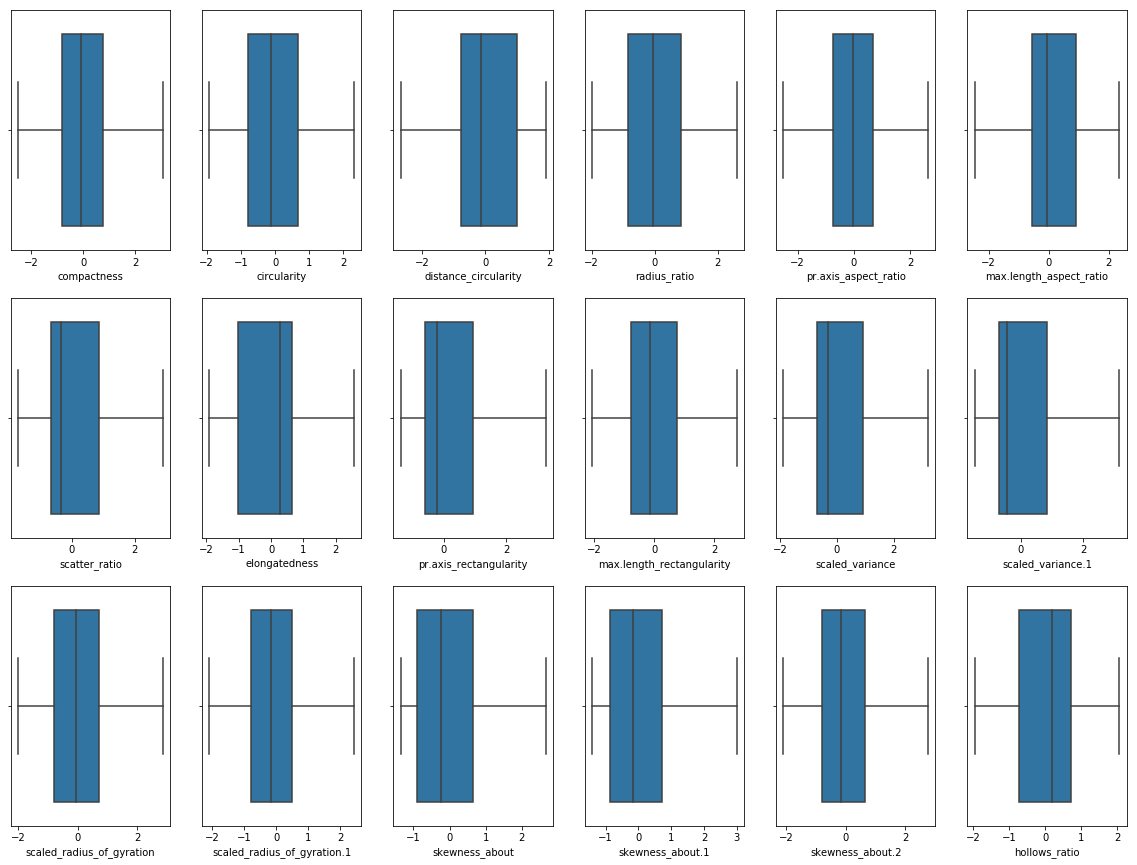

In [94]:
f,axes=plt.subplots(3,6,figsize=(20,15))
sns.boxplot(veh_new['compactness'],ax=axes[0,0])
sns.boxplot(veh_new['circularity'],ax=axes[0,1])
sns.boxplot(veh_new['distance_circularity'],ax=axes[0,2])
sns.boxplot(veh_new['radius_ratio'],ax=axes[0,3])
sns.boxplot(veh_new['pr.axis_aspect_ratio'],ax=axes[0,4])
sns.boxplot(veh_new['max.length_aspect_ratio'],ax=axes[0,5])
sns.boxplot(veh_new['scatter_ratio'],ax=axes[1,0])
sns.boxplot(veh_new['elongatedness'],ax=axes[1,1])
sns.boxplot(veh_new['pr.axis_rectangularity'],ax=axes[1,2])
sns.boxplot(veh_new['max.length_rectangularity'],ax=axes[1,3])
sns.boxplot(veh_new['scaled_variance'],ax=axes[1,4])
sns.boxplot(veh_new['scaled_variance.1'],ax=axes[1,5])
sns.boxplot(veh_new['scaled_radius_of_gyration'],ax=axes[2,0])
sns.boxplot(veh_new['scaled_radius_of_gyration.1'],ax=axes[2,1])
sns.boxplot(veh_new['skewness_about'],ax=axes[2,2])
sns.boxplot(veh_new['skewness_about.1'],ax=axes[2,3])
sns.boxplot(veh_new['skewness_about.2'],ax=axes[2,4])
sns.boxplot(veh_new['hollows_ratio'],ax=axes[2,5])
plt.show()

We could observe from the above box plots is that all the outliers have been removed.

# Let us look at the heatmap of the correlation matrix.

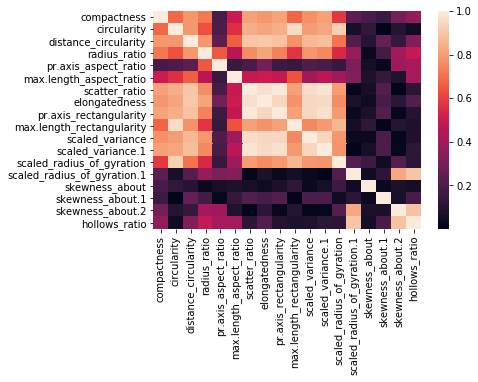

In [95]:
sns.heatmap(veh_new.corr().abs())

From the above heatmap we could observe that a lot of columns have good correlation of above 0.5 with the other columns.

We also observe that 'pr.axis_aspect_ratio' has a very bad correlation with the other columns.

# Applying PCA on the datset.

Creating the covariance matrix of the dataset.

In [96]:
cov_matrix = np.cov(veh_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68410553  0.78881387  0.71961479  0.1908949   0.5007546
   0.81281789 -0.7893113   0.81465658  0.67694334  0.77167667  0.80852195
   0.58692418 -0.24372909  0.19138429  0.15594218  0.29888625  0.36598446]
 [ 0.68410553  1.00118343  0.79032505  0.63453338  0.20298414  0.56052184
   0.84496963 -0.81965577  0.84151465  0.96052269  0.80104192  0.82560276
   0.92409666  0.06842895  0.13166084 -0.00244077 -0.10162884  0.04887875]
 [ 0.78881387  0.79032505  1.00118343  0.78544528  0.24052133  0.66374508
   0.90294052 -0.91044711  0.89257589  0.77472749  0.86935405  0.88414248
   0.7065917  -0.21962622  0.10011386  0.263584    0.14274077  0.3271998 ]
 [ 0.71961479  0.63453338  0.78544528  1.00118343  0.65021727  0.46011519
   0.76388577 -0.82024935  0.73881586  0.57565876  0.78310158  0.75160981
   0.54826077 -0.38431911  0.02677007  0.18093671  0.40474358  0.49176254]
 [ 0.1908949   0.20298414  0.24052133  0.65021727  1.00118343  0.1531626
   0.19274492 

Generating the eigen values and the eigen vectors.

In [97]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72839242e-01 -8.73928522e-02 -4.06659232e-02 -1.37911589e-01
   1.27345946e-01 -2.65584945e-01 -1.97869325e-01  7.54052339e-01
  -3.72539281e-01 -1.70955637e-01 -9.16571462e-02 -3.98718792e-03
  -1.54157018e-02 -6.17099309e-02  4.70263676e-02  1.02694159e-01
   8.45268200e-02  4.87029044e-02]
 [-2.87062888e-01  1.29497003e-01 -2.01111920e-01  4.69184441e-02
  -1.36865276e-01  7.85443375e-02  3.97517628e-01  6.82568051e-02
  -5.79527243e-02  1.78990170e-01  1.64159593e-02  1.65169825e-01
  -4.39713703e-02 -5.62981862e-02 -6.21326224e-01  1.40313072e-01
   3.65150903e-01 -2.51949932e-01]
 [-3.02100172e-01 -4.36816074e-02  5.94635772e-02 -1.11274221e-01
  -7.85274565e-02  2.03037551e-02 -1.64989493e-01 -2.81312310e-01
  -5.15821468e-02 -3.89790404e-01 -4.42386108e-01  6.19978086e-01
   1.26282707e-02  1.43043812e-01 -8.20415748e-03 -5.76793133e-02
  -9.33660355e-02 -1.02784118e-01]
 [-2.68199163e-01 -1.99648323e-01  6.66758868e-02  2.52125714e-01
   1.44053546e-01  

Finding variance and cumulative variance by each eigen vector.

In [98]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.98850839  72.50439304  79.04588486  85.35476185  90.26873847
  94.0260406   95.8237357   97.0948831   97.85458161  98.30520915
  98.73315355  99.11669218  99.35138093  99.53390321  99.70924498
  99.84208653  99.96116149 100.        ]


Since we are looking for 95% of variance, we will choose the frst 7 principal components as it covers 95.8237357 variance as per the above.

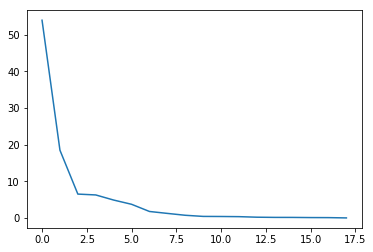

In [99]:
plt.plot(var_exp)

In [100]:
pca = PCA(n_components=7)
veh_pca = pca.fit_transform(veh_new)

In [101]:
pca.components_

array([[ 0.27283924,  0.28706289,  0.30210017,  0.26819916,  0.09716173,
         0.19531675,  0.31051066, -0.30923699,  0.30761558,  0.27847539,
         0.30015358,  0.30576811,  0.26372998, -0.04041728,  0.03509806,
         0.0595689 ,  0.03793386,  0.08459531],
       [-0.08739285,  0.129497  , -0.04368161, -0.19964832, -0.25917468,
        -0.10886128,  0.07523395, -0.01290116,  0.08758544,  0.12193811,
         0.07644504,  0.07008715,  0.20922453,  0.5032428 , -0.00898837,
        -0.08763349, -0.50229156, -0.50852236],
       [-0.04066592, -0.20111192,  0.05946358,  0.06667589, -0.04474713,
        -0.16197674,  0.10979163, -0.09355478,  0.10446263, -0.21688829,
         0.14724796,  0.1059526 , -0.2009133 ,  0.07997538, -0.56039952,
         0.66597043, -0.05957771, -0.04622097],
       [ 0.13791159, -0.04691844,  0.11127422, -0.25212571, -0.60641888,
         0.26134095,  0.00904935,  0.06137529,  0.03385423,  0.02987418,
        -0.05825665,  0.00487858, -0.09144074, -0.116

Converting the PCA components to dataframe.

In [102]:
veh_df = pd.DataFrame(veh_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [103]:
veh_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.582574,-0.677272,-0.440063,-0.760970,-0.700767,-1.881791,-0.179687
1,-1.510448,-0.338801,-0.374737,1.269107,-0.325749,-0.141137,0.209360
2,3.913249,0.238020,-1.279680,0.149486,0.977629,-0.686568,0.815586
3,-1.539036,-3.041153,-0.491040,0.327461,-0.599669,0.331370,0.123678
4,-0.601406,1.475268,-0.233945,-0.896042,0.645933,-1.354036,0.504851


Adding the dependent column class to the new dataframe.

In [104]:
veh_df['class'] = veh['class']
veh_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,class
0,0.582574,-0.677272,-0.440063,-0.760970,-0.700767,-1.881791,-0.179687,van
1,-1.510448,-0.338801,-0.374737,1.269107,-0.325749,-0.141137,0.209360,van
2,3.913249,0.238020,-1.279680,0.149486,0.977629,-0.686568,0.815586,car
3,-1.539036,-3.041153,-0.491040,0.327461,-0.599669,0.331370,0.123678,van
4,-0.601406,1.475268,-0.233945,-0.896042,0.645933,-1.354036,0.504851,bus


# Let us plot the PCA applied dataset to see how the columns are correlated.

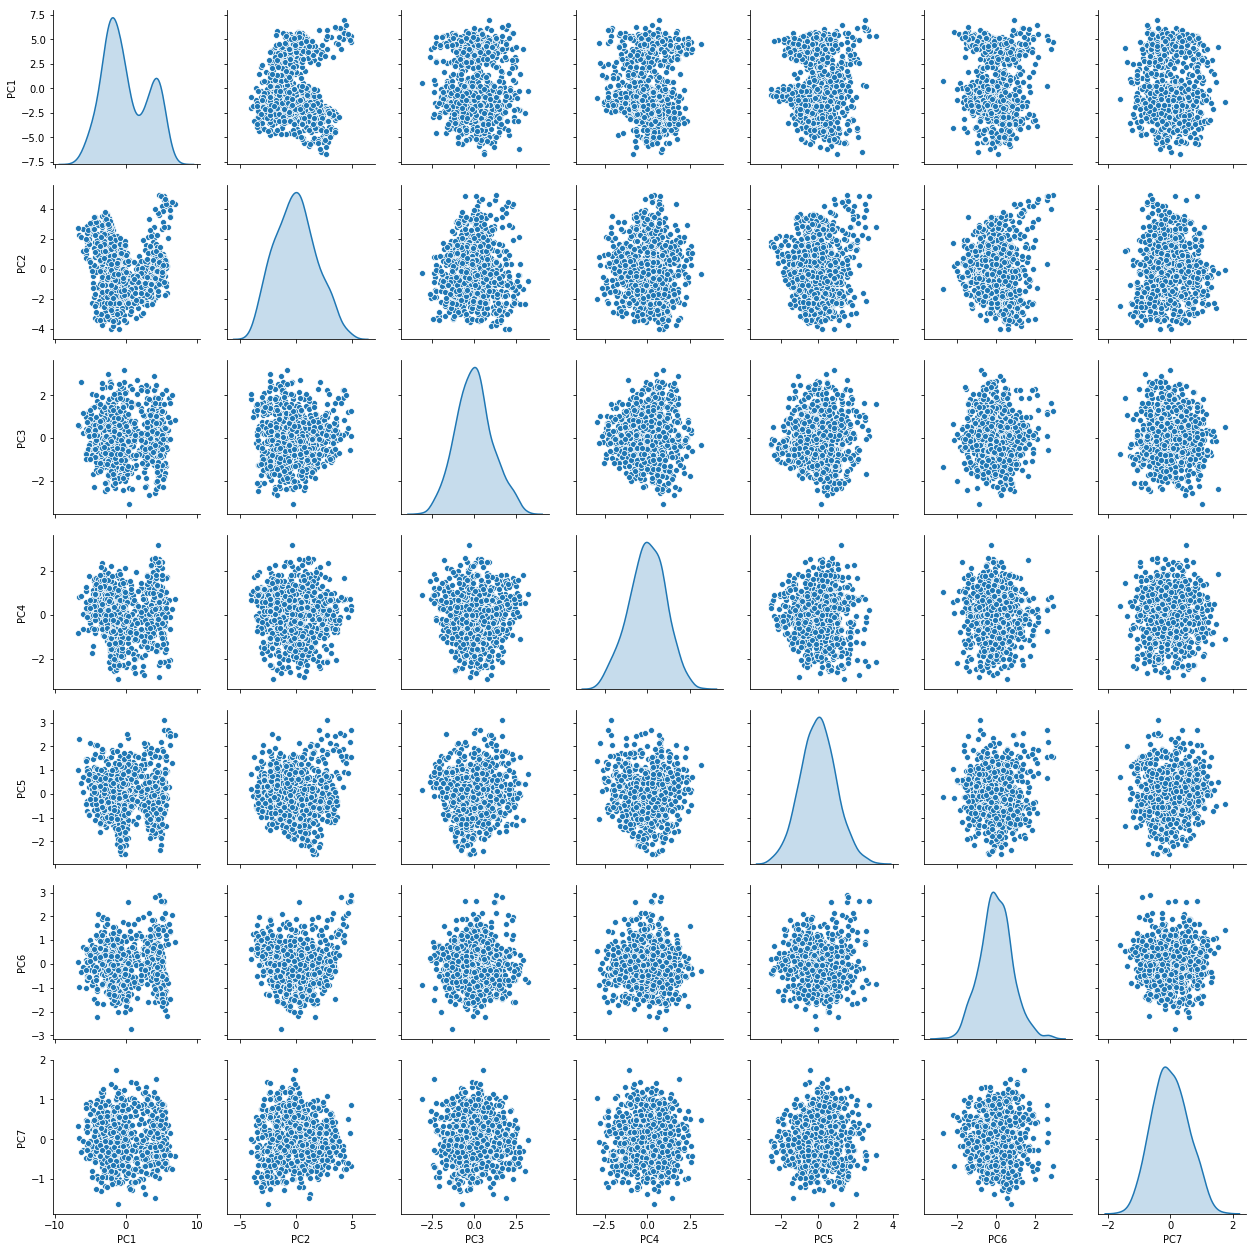

In [105]:
sns.pairplot(veh_df, diag_kind='kde')

From the above scatter plots, we could see that the data is scattered and see no collinearity.

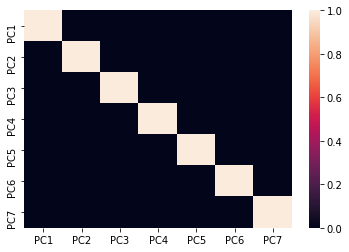

In [106]:
sns.heatmap(veh_df.corr().abs())

From the above heatmap we could observe that there is no multi-collinearity between columns.

In [107]:
x = veh_df.drop("class", axis=1)
y = veh_df["class"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 7)

# Using Grid Search with C values - 0.01, 0.05, 0.5 & 1 and with Kernel - Linear and RBF and Cross Validation with 5 folds.

In [108]:
params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear','rbf']}
model = SVC()
model1 = GridSearchCV(model, param_grid=params, cv=5,n_jobs=-1)

In [109]:
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Prediction with the model

In [110]:
prediction=model1.predict(X_test)

Getting the accuracy of the model

In [111]:
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9330708661417323


The confusion matrix of the model.

In [112]:
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[ 66   3   1]
 [  0 115   4]
 [  0   9  56]]
